In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline


Bad key savefig.frameon in file C:\Users\Khemero\anaconda3\envs\mlpyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Khemero\anaconda3\envs\mlpyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Khemero\anaconda3\envs\mlpyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr'

In [2]:
# Load the data
df = pd.read_csv(
    Path("Resources/aus-property-sales-sep2018-april2020.csv"), index_col="date_sold", infer_datetime_format=True, parse_dates=True
)
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
date_sold,,,,,,,,,,
2018-09-18,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
2018-09-24,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2018-09-26,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
2018-09-26,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
2018-10-02,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180


In [3]:
# Column Names
df.columns

Index(['price', 'suburb', 'city_name', 'state', 'lat', 'lon', 'bedrooms',
       'property_type', 'loc_pid', 'lga_pid'],
      dtype='object')

In [4]:
# drop columns loc_pid & lga_pid
df = df.drop(['loc_pid', 'lga_pid'], axis=1)

In [5]:
# clean data
df.isna().sum()

price            62508
suburb               0
city_name            0
state                0
lat                 78
lon                 78
bedrooms             0
property_type        0
dtype: int64

In [6]:
# perform clean
# Drop NAs and replace positive/negative infinity values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(axis=0) # 0 is rows, 1 is columns
df.isnull().sum()

price            0
suburb           0
city_name        0
state            0
lat              0
lon              0
bedrooms         0
property_type    0
dtype: int64

In [7]:
df.shape

(257773, 8)

In [8]:
# Cut out non VIC suburbs
df = df.loc[df['state'] == 'VIC']
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type
date_sold,,,,,,,,
2018-09-04,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit
2018-09-05,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit
2018-11-02,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit
2018-11-02,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit
2018-11-03,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit


In [9]:
df.shape

(98535, 8)

In [10]:
# Feature Engineering
# creating a price per bedroom
df['price_per_bedroom'] = round((df['price'] / df['bedrooms']),2)
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom
date_sold,,,,,,,,,
2018-09-04,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,337500.00
2018-09-05,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,185000.00
2018-11-02,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,160000.00
2018-11-02,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,192500.00
2018-11-03,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,146666.67


In [11]:
# Dimensionality reduction technique
suburb = df.suburb.value_counts(ascending=False)
suburb

Pakenham             1667
Craigieburn          1327
Frankston            1220
Melbourne            1081
Sunbury              1048
                     ... 
Tarrawarra              1
Humevale                1
Mount Toolebewong       1
Red Hill South          1
Princes Hill            1
Name: suburb, Length: 490, dtype: int64

In [12]:
# No. of unique suburbs
len(suburb)

490

In [13]:
# Count
print('Total no of locations where data points are more than 10 = %s' % (len(suburb[suburb > 10])))
print('Total no of locations where data points are less than 10 = %s' % (len(suburb[suburb <= 10])))

Total no of locations where data points are more than 10 = 414
Total no of locations where data points are less than 10 = 76


In [14]:
# List of suburbs with < 10
suburb_less_than_10 = suburb[suburb <= 10]
suburb_less_than_10

Nar Nar Goon         9
Harkaway             9
Strathtulloh         9
Clematis             9
Langwarrin South     9
                    ..
Tarrawarra           1
Humevale             1
Mount Toolebewong    1
Red Hill South       1
Princes Hill         1
Name: suburb, Length: 76, dtype: int64

In [15]:
# Renaming these to 'Other'
df.suburb = df.suburb.apply(lambda x: 'Other' if x in suburb_less_than_10 else x )
len(df.suburb.unique())

415

In [16]:
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom
date_sold,,,,,,,,,
2018-09-04,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,337500.00
2018-09-05,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,185000.00
2018-11-02,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,160000.00
2018-11-02,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,192500.00
2018-11-03,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,146666.67


In [17]:
# Outlier Removal
df['price'].describe()

# e.g. mean is $800k

count    9.853500e+04
mean     8.004896e+05
std      5.080976e+05
min      1.000000e+03
25%      5.250000e+05
50%      6.600000e+05
75%      9.017500e+05
max      9.600000e+06
Name: price, dtype: float64

In [18]:
df.describe().round(1)

,price,lat,lon,bedrooms,price_per_bedroom
count,98535.0,98535.0,98535.0,98535.0,98535.0
mean,800489.6,-37.9,145.0,3.1,inf
std,508097.6,0.2,0.2,0.9,NaN
min,1000.0,-38.5,144.5,0.0,333.3
25%,525000.0,-37.9,144.9,2.0,175333.3
50%,660000.0,-37.8,145.0,3.0,233333.3
75%,901750.0,-37.8,145.2,4.0,321500.0
max,9600000.0,-37.4,145.9,5.0,inf


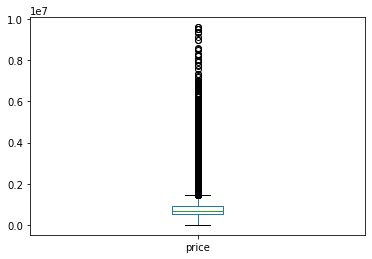

<Figure size 432x288 with 0 Axes>

In [19]:
df.plot(kind='box',y='price')
plt.show()
plt.savefig('Images/outliers_b4.png')

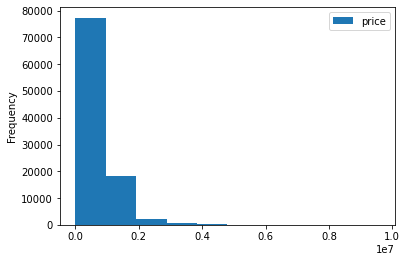

In [20]:
# Visualise
df.plot(kind='hist',x='price_per_bedroom',y='price')
plt.savefig('Images/dist_b4.png')
plt.show()


In [21]:
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom
date_sold,,,,,,,,,
2018-09-04,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,337500.00
2018-09-05,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,185000.00
2018-11-02,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,160000.00
2018-11-02,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,192500.00
2018-11-03,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,146666.67


In [22]:
# Remove outlier pricing in price per bedroom

def remove_outliers(df):
    df_outliers = pd.DataFrame()
    for key, dframe in df.groupby('suburb'):
        mean = np.mean(dframe.price_per_bedroom)
        std = np.std(dframe.price_per_bedroom)
        reduced_df = dframe[(dframe.price_per_bedroom>(mean-std)) & (dframe.price_per_bedroom<=(mean + std))] 
        df_outliers = pd.concat([df_outliers,reduced_df],ignore_index=True)
    return df_outliers

df = remove_outliers(df)
df.shape

(69894, 9)

In [23]:
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom
0,545000.0,Abbotsford,Melbourne,VIC,-37.801729,144.996385,2,unit,272500.0
1,596000.0,Abbotsford,Melbourne,VIC,-37.810297,145.007797,2,unit,298000.0
2,690000.0,Abbotsford,Melbourne,VIC,-37.800354,144.998263,2,unit,345000.0
3,695000.0,Abbotsford,Melbourne,VIC,-37.799107,145.001063,2,unit,347500.0
4,541000.0,Abbotsford,Melbourne,VIC,-37.810366,145.006504,2,unit,270500.0


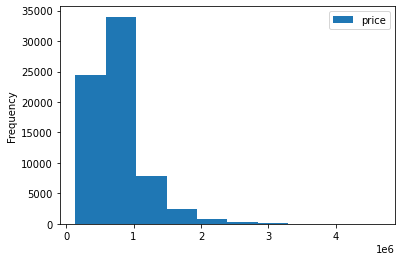

In [24]:
# Histogram re-plotted, should be more normal
df.plot(kind='hist',x='price_per_bedroom',y='price')
plt.savefig('Images/dist_after.png')
plt.show()

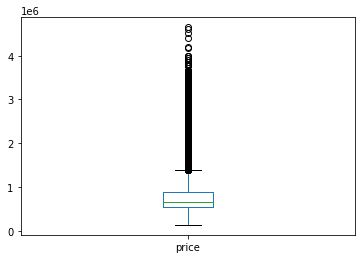

<Figure size 432x288 with 0 Axes>

In [25]:
df.plot(kind='box',y='price')
plt.show()
plt.savefig('Images/outliers_after.png')

In [26]:
df.describe().round(1)

,price,lat,lon,bedrooms,price_per_bedroom
count,69894.0,69894.0,69894.0,69894.0,69894.0
mean,769063.5,-37.9,145.0,3.1,256247.3
std,379063.7,0.2,0.2,0.9,105373.7
min,136000.0,-38.5,144.5,1.0,97500.0
25%,535000.0,-38.0,144.9,3.0,177000.0
50%,665000.0,-37.8,145.0,3.0,230408.3
75%,880000.0,-37.8,145.2,4.0,310000.0
max,4650000.0,-37.4,145.9,5.0,1000000.0


In [27]:
df.shape

# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

# other outlier removal techniques
# Isolation Forest
# EllipticEnvelope class
# LocalOutlierFactor()
# One-Class SVM

(69894, 9)

In [28]:
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom
0,545000.0,Abbotsford,Melbourne,VIC,-37.801729,144.996385,2,unit,272500.0
1,596000.0,Abbotsford,Melbourne,VIC,-37.810297,145.007797,2,unit,298000.0
2,690000.0,Abbotsford,Melbourne,VIC,-37.800354,144.998263,2,unit,345000.0
3,695000.0,Abbotsford,Melbourne,VIC,-37.799107,145.001063,2,unit,347500.0
4,541000.0,Abbotsford,Melbourne,VIC,-37.810366,145.006504,2,unit,270500.0


In [29]:
# Turn categorical data into binary via Get dummies
dummies = pd.get_dummies(df.suburb)
dummies.head()

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Williamstown,Windsor,Wonga Park,Woori Yallock,Wyndham Vale,Yallambie,Yarra Glen,Yarra Junction,Yarrambat,Yarraville
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom
0,545000.0,Abbotsford,Melbourne,VIC,-37.801729,144.996385,2,unit,272500.0
1,596000.0,Abbotsford,Melbourne,VIC,-37.810297,145.007797,2,unit,298000.0
2,690000.0,Abbotsford,Melbourne,VIC,-37.800354,144.998263,2,unit,345000.0
3,695000.0,Abbotsford,Melbourne,VIC,-37.799107,145.001063,2,unit,347500.0
4,541000.0,Abbotsford,Melbourne,VIC,-37.810366,145.006504,2,unit,270500.0


In [31]:
# add it to df
df = pd.concat([df,dummies],axis='columns')
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom,Abbotsford,...,Williamstown,Windsor,Wonga Park,Woori Yallock,Wyndham Vale,Yallambie,Yarra Glen,Yarra Junction,Yarrambat,Yarraville
0,545000.0,Abbotsford,Melbourne,VIC,-37.801729,144.996385,2,unit,272500.0,1,...,0,0,0,0,0,0,0,0,0,0
1,596000.0,Abbotsford,Melbourne,VIC,-37.810297,145.007797,2,unit,298000.0,1,...,0,0,0,0,0,0,0,0,0,0
2,690000.0,Abbotsford,Melbourne,VIC,-37.800354,144.998263,2,unit,345000.0,1,...,0,0,0,0,0,0,0,0,0,0
3,695000.0,Abbotsford,Melbourne,VIC,-37.799107,145.001063,2,unit,347500.0,1,...,0,0,0,0,0,0,0,0,0,0
4,541000.0,Abbotsford,Melbourne,VIC,-37.810366,145.006504,2,unit,270500.0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# one hot encoder

In [33]:
# Turn categorical data into binary via Get dummies
dummies2 = pd.get_dummies(df.property_type)
dummies2.head()

,house,townhouse,unit
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


dummies2 = pd.get_dummies(df.property_type)
dummies2.head()

In [34]:
df = pd.concat([df,dummies2],axis='columns')
df.head()

,price,suburb,city_name,state,lat,lon,bedrooms,property_type,price_per_bedroom,Abbotsford,...,Woori Yallock,Wyndham Vale,Yallambie,Yarra Glen,Yarra Junction,Yarrambat,Yarraville,house,townhouse,unit
0,545000.0,Abbotsford,Melbourne,VIC,-37.801729,144.996385,2,unit,272500.0,1,...,0,0,0,0,0,0,0,0,0,1
1,596000.0,Abbotsford,Melbourne,VIC,-37.810297,145.007797,2,unit,298000.0,1,...,0,0,0,0,0,0,0,0,0,1
2,690000.0,Abbotsford,Melbourne,VIC,-37.800354,144.998263,2,unit,345000.0,1,...,0,0,0,0,0,0,0,0,0,1
3,695000.0,Abbotsford,Melbourne,VIC,-37.799107,145.001063,2,unit,347500.0,1,...,0,0,0,0,0,0,0,0,0,1
4,541000.0,Abbotsford,Melbourne,VIC,-37.810366,145.006504,2,unit,270500.0,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# drop suburb
df = df.drop(['suburb', 'city_name', 'state', 'lat', 'lon', 'price_per_bedroom', 'property_type'],axis=1)
df.head()

,price,bedrooms,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,...,Woori Yallock,Wyndham Vale,Yallambie,Yarra Glen,Yarra Junction,Yarrambat,Yarraville,house,townhouse,unit
0,545000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,596000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,690000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,695000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,541000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df.shape

(69894, 401)

# Split the Data into Training and Testing

In [37]:
df.head()

,price,bedrooms,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,...,Woori Yallock,Wyndham Vale,Yallambie,Yarra Glen,Yarra Junction,Yarrambat,Yarraville,house,townhouse,unit
0,545000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,596000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,690000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,695000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,541000.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df.isnull().sum()

price           0
bedrooms        0
Abbotsford      0
Aberfeldie      0
Airport West    0
               ..
Yarrambat       0
Yarraville      0
house           0
townhouse       0
unit            0
Length: 401, dtype: int64

In [39]:
df.shape

(69894, 401)

In [40]:
df.isnull().count()

price           69894
bedrooms        69894
Abbotsford      69894
Aberfeldie      69894
Airport West    69894
                ...  
Yarrambat       69894
Yarraville      69894
house           69894
townhouse       69894
unit            69894
Length: 401, dtype: int64

In [41]:
#df = df.sample(10000)

In [42]:
# Create our features
X = df.drop(['price'],axis='columns')
X = pd.get_dummies(X) # converting all the columns with get dummies.

# Create our target
y = df["price"].to_frame()

X.columns

Index(['bedrooms', 'Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
       'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
       ...
       'Woori Yallock', 'Wyndham Vale', 'Yallambie', 'Yarra Glen',
       'Yarra Junction', 'Yarrambat', 'Yarraville', 'house', 'townhouse',
       'unit'],
      dtype='object', length=400)

In [43]:
X.shape

(69894, 400)

In [44]:
y.shape

(69894, 1)

In [45]:
df.columns

Index(['price', 'bedrooms', 'Abbotsford', 'Aberfeldie', 'Airport West',
       'Albanvale', 'Albert Park', 'Albion', 'Alphington', 'Altona',
       ...
       'Woori Yallock', 'Wyndham Vale', 'Yallambie', 'Yarra Glen',
       'Yarra Junction', 'Yarrambat', 'Yarraville', 'house', 'townhouse',
       'unit'],
      dtype='object', length=401)

In [46]:
df.head()

#Save a dictionary into a pickle file.
import pickle
pickle.dump(df, open( "df.p", "wb" ) )

In [47]:
# putting the imports here so I can run each resample individually (I was getting the scame scores)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from math import sqrt

In [48]:
# X_train = df.loc['2018':'2019']
# y_train = df.loc['2018':'2019']
# X_test = df.price.loc['2020':]
# y_test = df.price.loc['2020':]

X_train, X_test, y_train, y_test = train_test_split(
    
# X_train, y_train, , X_test, y_test = train_test_split(
    X,
    y,
    random_state=1,
    )

# why did nick say test train split

In [49]:
# X_train & y_train must have the same no. of rows
X_train.shape[0] != y_train.shape[0]

False

In [50]:
lr = LinearRegression()
pickle_lr = lr.fit(X_train, y_train)
print("Linear Regression R^2 Score: ", lr.score(X_train, y_train))
print("Linear Regression Test R^2 Score: ", lr.score(X_test, y_test))

#Save a dictionary into a pickle file.
import pickle
pickle.dump(pickle_lr, open("Linear_regression.p", "wb" ))

Linear Regression R^2 Score:  0.7986799701445986
Linear Regression Test R^2 Score:  0.7972087446386317


In [64]:
# Load the model and make the predictions from the x test dataset
lr = pickle.load(open( "Linear_regression.p", "rb" ))
y_pred = lr.predict(X_test)
y_pred

rms = sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error: ", round(rms))
print("Mean Absolute Error: ", int(mean_absolute_error(y_pred, y_test)))
print("Cross Validation Score: ", cross_val_score(lr, X_test, y_test, cv=5)) # should be similar numbers

Root Mean Squared Error:  169703
Mean Absolute Error:  114352
Cross Validation Score:  [ 7.82227726e-01 -2.13476979e+16 -2.84230725e+17 -6.68387815e+17
  7.89811006e-01]


In [52]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=1)
pickle_rfr = rfr.fit(X_train, y_train.values.ravel())

#Save a dictionary into a pickle file.
pickle.dump(pickle_rfr, open("RandomForestRegressor.p", "wb" ))

print("Random Forest R^2 Score: ", rfr.score(X_train, y_train))
print("Random Forest Test R^2 Score: ", rfr.score(X_test, y_test))

Random Forest R^2 Score:  0.33681393451273123
Random Forest Test R^2 Score:  0.3231480201233985


In [67]:
# Load the model and make the predictions from the x test dataset
rfr = pickle.load(open("RandomForestRegressor.p", "rb" ))
y_pred = rfr.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test.values.ravel()))
print("Root Mean Squared Error: ", round(rms))
print("Mean Absolute Error: ", int(mean_absolute_error(y_pred, y_test.values.ravel())))
print("Cross Validation Score: ", cross_val_score(rfr, X_test, y_test.values.ravel(), cv=5))

Root Mean Squared Error:  310035
Mean Absolute Error:  221423
Cross Validation Score:  [0.30170823 0.33474627 0.31383077 0.35079587 0.29754919]


In [54]:
gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, random_state=1)
pickle_gbr = gbr.fit(X_train, y_train.values.ravel())

#Save a dictionary into a pickle file.
pickle.dump(pickle_gbr, open("GradientBoostingRegressor.p", "wb" ))

print("Gradient Boosting R^2 Score: ", gbr.score(X_train, y_train))
print("Gradient Boosting Test R^2 Score: ", gbr.score(X_test, y_test))

Gradient Boosting R^2 Score:  0.8762975610743029
Gradient Boosting Test R^2 Score:  0.8633048287825686


In [68]:
# Load the model and make the predictions from the x test dataset
gbr = pickle.load(open("GradientBoostingRegressor.p", "rb" ))
y_pred = gbr.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test.values.ravel()))
print("Root Mean Squared Error: ", round(rms))
print("Mean Absolute Error: ", int(mean_absolute_error(y_pred, y_test.values.ravel())))
print("Cross Validation Score: ", cross_val_score(gbr, X_test, y_test.values.ravel(), cv=5))

Root Mean Squared Error:  139329
Mean Absolute Error:  91957
Cross Validation Score:  [0.84162455 0.85719975 0.83407461 0.84507072 0.82470141]


In [56]:
# knr = KNeighborsRegressor(weights='distance', n_neighbors=200)
# knr.fit(X_train, y_train.values.ravel())
# print("KNN Score: ", knr.score(X_train, y_train))
# print("KNN Test Score: ", knr.score(X_test, y_test))

In [57]:
# from imblearn.ensemble import BalancedRandomForestClassifier

# brf = BalancedRandomForestClassifier(random_state=1, n_estimators=100)
# pickle_brf = brf.fit(X_train, y_train.values.ravel()) 

# #Save a dictionary into a pickle file.
# pickle.dump(pickle_brf, open("BalancedRandomForestClassifier.p", "wb" ))

# print("BRF R^2 Score: ", brf.score(X_train, y_train))
# print("BRF Test R^2 Score: ", brf.score(X_test, y_test))


# """
# I cant crunch this:

# MemoryError                               Traceback (most recent call last)
# <ipython-input-54-62d673ee5302> in <module>
#       5 
#       6 #Save a dictionary into a pickle file.
# ----> 7 pickle.dump(pickle_brf, open("BalancedRandomForestClassifier.p", "wb" ))
#       8 
#       9 print("BRF R^2 Score: ", brf.score(X_train, y_train))

# MemoryError: 

# """

In [58]:
# # Load the model and make the predictions from the x test dataset
# brf = pickle.load(open("BalancedRandomForestClassifier.p", "rb" ))
# y_pred = brf.predict(X_test)

# rms = sqrt(mean_squared_error(y_pred, y_test))
# print("Root Mean Squared Error: ", round(rms))
# print("Mean Absolute Error: ", int(mean_absolute_error(y_pred, y_test)))
# print("Balanced Accuracy Score: ", balanced_accuracy_score(y_test, y_pred))
# print("Cross Validation Score: ", cross_val_score(gbr, X_test, y_test, cv=5))

In [59]:
# x = zip(brf.feature_importances_, X.columns)
# importances_sorted = sorted(x, reverse=True)
# importances_sorted[:10]

In [60]:
# Train the EasyEnsembleClassifier
# YOUR CODE HERE

# https://imbalanced-learn.org/stable/generated/imblearn.ensemble.EasyEnsembleClassifier.html
from imblearn.ensemble import EasyEnsembleClassifier 

eec = EasyEnsembleClassifier(random_state=1, n_estimators=100, verbose=1)
pickle_eec = eec.fit(X_train, y_train.values.ravel())

#Save a dictionary into a pickle file.
pickle.dump(pickle_eec, open("EasyEnsembleClassifier.p", "wb" ))

print("EEC R^2 Score: ", eec.score(X_train, y_train))
print("EEC Test R^2 Score: ", eec.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 32.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 352.2min finished


EEC R^2 Score:  0.0070202212895841285


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 115.6min finished


EEC Test R^2 Score:  0.0


In [ ]:
# Load the model and make the predictions from the x test dataset
eec = pickle.load(open("EasyEnsembleClassifier.p", "rb" ))
y_pred = eec.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test.values.ravel()))
print("Root Mean Squared Error: ", round(rms))
print("Mean Absolute Error: ", int(mean_absolute_error(y_pred, y_test.values.ravel())))
print("Cross Validation Score: ", cross_val_score(gbr, X_test, y_test.values.ravel(), cv=5))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# Train the lgb
# YOUR CODE HERE

https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
import lightgbm as lgb

light_gbm = lgb(random_state=1, n_estimators=100, verbose=1)
pickle_lgb = lgb.fit(X_train, y_train.values.ravel())

#Save a dictionary into a pickle file.
pickle.dump(pickle_lgb, open("light_gbm.p", "wb" ))

print("EEC R^2 Score: ", lgb.score(X_train, y_train))
print("EEC Test R^2 Score: ", lgb.score(X_test, y_test))

In [ ]:
# Load the model and make the predictions from the x test dataset
lgb = pickle.load(open("light_gbm.p", "rb" ))
y_pred = lgb.predict(X_test)

rms = sqrt(mean_squared_error(y_pred, y_test.values.ravel()))
print("Root Mean Squared Error: ", round(rms))
print("Mean Absolute Error: ", int(mean_absolute_error(y_pred, y_test.values.ravel())))
print("Cross Validation Score: ", cross_val_score(gbr, X_test, y_test.values.ravel(), cv=5))

In [62]:
def price_of(suburb, bedrooms, bath):    
    suburb_index = np.where(X.columns==suburb)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bath
#    x[2] = property_type
    if suburb_index >= 0:
        x[suburb_index] = 1

    return eec.predict([x])[0]

In [63]:
"""
input example:
price_of('Toorak', 2, 2, house)

this means, predict price for the suburb Toorak, with 2 bedrooms, 2 bathrooms, and property type house.
"""

price_of('Clarinda', 2, 2)

# Add property type e.g. house, townhouse or unit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


712550.0